# <p style="background-image: url(https://img.freepik.com/free-vector/neon-lights-background-theme_52683-44625.jpg);font-family:Pacifico ,cursive;font-size:150%; color:#E6E6FA; text-align:center; border-radius: 20%; padding:20px; font-weight: normal; border: 3px dashed #14adc6; box-shadow: 0px 5px 10px  rgba(0, 0, 0, 0.2);text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.4); background-size: cover; background-repeat: no-repeat; background-position: center;">About Author
</p>

# **Arshman Khalid**  
<p style="font-size: 1.5rem; font-weight: bold;">Data Scientist | Software Engineer | ex Consultant PwC | ex Senior Data Analyst Fortune 500</p>

With over 5 years of expertise in data science and software engineering, I am dedicated to transforming complex data into actionable insights. My focus lies in predictive analytics, data strategy, and the implementation of robust machine learning models that drive measurable business outcomes. I have a track record of optimizing operations, reducing costs, and improving decision-making processes across industries. Proficient in Python, Alteryx, Power BI, and cloud platforms.

When I am not wrangling datasets, you will find me attempting to code my way to the perfect cup of coffee!


<div style="text-align: left; font-family: Arial, sans-serif; margin-top: 20px;">
    <a href="https://www.linkedin.com/in/arshmankhalid/" style="text-decoration: none; color: #fff; margin-right: 10px;">
        <span style="background-color: #0077B5; padding: 8px 20px; border-radius: 5px; font-size: 14px; display: inline-block; width: 120px; text-align: center;">LinkedIn</span>
    </a>
    <a href="https://x.com/arshmankhalid" style="text-decoration: none; color: #fff; margin-right: 10px;">
        <span style="background-color: #000; padding: 8px 20px; border-radius: 5px; font-size: 14px; display: inline-block; width: 120px; text-align: center;">X</span>
    </a>
    <a href="https://github.com/arshmankhalid88" style="text-decoration: none; color: #fff; margin-right: 10px;">
        <span style="background-color: #333; padding: 8px 20px; border-radius: 5px; font-size: 14px; display: inline-block; width: 120px; text-align: center;">GitHub</span>
    </a>
    <a href="https://www.kaggle.com" style="text-decoration: none; color: #fff; margin-right: 10px;">
        <span style="background-color: #20BEFF; padding: 8px 20px; border-radius: 5px; font-size: 14px; display: inline-block; width: 120px; text-align: center;">Kaggle</span>
    </a>
</div>


# <p style="background-image: url(https://img.freepik.com/free-vector/neon-lights-background-theme_52683-44625.jpg);font-family:Pacifico ,cursive;font-size:150%; color:#E6E6FA; text-align:center; border-radius: 20%; padding:20px; font-weight: normal; border: 3px dashed #14adc6; box-shadow: 0px 5px 10px  rgba(0, 0, 0, 0.2);text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.4); background-size: cover; background-repeat: no-repeat; background-position: center;">Load Libraries
</p>

In [1]:
# ==================================
# Import Necessary Libraries
# ==================================

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import folium
import geopandas as gpd
from shapely.geometry import Point
from folium.plugins import HeatMap
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import KMeans, DBSCAN

# Ignore warnings for cleaner outputs
warnings.filterwarnings('ignore')

# ==================================
# Display Settings
# ==================================

# Set maximum rows and columns to display all rows/columns in DataFrames
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

# ==================================
# Heading for Data Visualization with Plotly
# ==================================
import plotly.express as px
import plotly.subplots as sp




# <p style="background-image: url(https://img.freepik.com/free-vector/neon-lights-background-theme_52683-44625.jpg);font-family:Pacifico ,cursive;font-size:150%; color:#E6E6FA; text-align:center; border-radius: 20%; padding:20px; font-weight: normal; border: 3px dashed #14adc6; box-shadow: 0px 5px 10px  rgba(0, 0, 0, 0.2);text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.4); background-size: cover; background-repeat: no-repeat; background-position: center;">Load Datasets
</p>

In [2]:
daily_rent_detail = pd.read_csv('/kaggle/input/capital-bikeshare-dataset-202005202408/daily_rent_detail.csv')
weather = pd.read_csv('/kaggle/input/capital-bikeshare-dataset-202005202408/weather.csv')
station_list = pd.read_csv('/kaggle/input/capital-bikeshare-dataset-202005202408/station_list.csv')
usage_frequency = pd.read_csv('/kaggle/input/capital-bikeshare-dataset-202005202408/usage_frequency.csv')

In [3]:
daily_rent_detail.head()

ride_id rideable_type           started_at             ended_at  \
0  946D42AD89539210   docked_bike  2020-05-30 17:25:29  2020-05-31 18:25:22   
1  CC46FAAB662B8613   docked_bike  2020-05-09 14:42:04  2020-05-09 15:06:33   
2  72F00B2FB833D6ED   docked_bike  2020-05-24 17:27:19  2020-05-24 17:43:51   
3  4DFBE6AED989DF35   docked_bike  2020-05-27 15:29:52  2020-05-27 15:47:13   
4  1AAFE6B4331AB9DF   docked_bike  2020-05-31 14:06:03  2020-05-31 14:30:30   

                                start_station_name start_station_id  \
0                                Anacostia Library            31804   
1                                   10th & E St NW            31256   
2  Connecticut Ave & Newark St NW / Cleveland Park            31305   
3  Connecticut Ave & Newark St NW / Cleveland Park            31305   
4                       Georgia Ave & Morton St NW            31419   

                end_station_name end_station_id  start_lat  start_lng  \
0                 11th & H St NE        31614.0  38.865784 -76.978400   
1  21st St & Constitution Ave NW        31261.0  38.895914 -77.026064   
2                 12th & U St NW        31268.0  38.934267 -77.057979   
3           14th & Belmont St NW        31119.0  38.934267 -77.057979   
4                 17th & K St NW        31213.0  38.932128 -77.023500   

     end_lat    end_lng member_casual  
0  38.899983 -76.991383        casual  
1  38.892459 -77.046567        member  
2  38.916787 -77.028139        member  
3  38.921074 -77.031887        casual  
4  38.902760 -77.038630        casual

# <p style="background-image: url(https://img.freepik.com/free-vector/neon-lights-background-theme_52683-44625.jpg);font-family:Pacifico ,cursive;font-size:150%; color:#E6E6FA; text-align:center; border-radius: 20%; padding:20px; font-weight: normal; border: 3px dashed #14adc6; box-shadow: 0px 5px 10px  rgba(0, 0, 0, 0.2);text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.4); background-size: cover; background-repeat: no-repeat; background-position: center;">EDA
</p>

## <p style="background-image: url(https://img.freepik.com/free-vector/neon-lights-background-theme_52683-44625.jpg); font-family: Pacifico, cursive; font-size: 200%; color: #E6E6FA; text-align: center; border-radius: 20%; padding: 20px; font-weight: normal; border: 3px dashed #14adc6; box-shadow: 0px 5px 10px rgba(0, 0, 0, 0.2); text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.4); background-size: cover; background-repeat: no-repeat; background-position: center; width: 50%; margin: 0; float: left;">daily_rent_detail dataset
</p>


In [4]:
def print_heading(title):
    """Prints a formatted heading."""
    print("=" * 70)
    print(" " * 25 + title)
    print("=" * 70)

def print_dataset_info(df):
    """Prints various information about the dataset."""
    # Main heading
    print_heading("Info of Dataset")

    # Sample 8 rows from the DataFrame
    print_heading("Sample of 8 Rows")
    print(df.sample(8))
    print("\n")

    # Display DataFrame info
    print_heading("DataFrame Info")
    df.info()
    print("\n")

    # Percentage of missing values
    print_heading("Percentage of Missing Values")
    missing_percentage = df.isnull().sum() / len(df) * 100
    print(missing_percentage)
    print("\n")

    # Shape of the DataFrame
    print_heading("Shape of DataFrame")
    print(df.shape)
    print("\n")

    # Columns of the DataFrame
    print_heading("Columns of DataFrame")
    print(df.columns)
    print("\n")

    # Check for duplicated rows
    print_heading("Count of Duplicated Rows")
    print(df.duplicated().sum())
    print("\n")

    # Describe the DataFrame
    print_heading("Descriptive Statistics")
    print(df.describe())
    
    
    
print_dataset_info(daily_rent_detail)

                         Info of Dataset
                         Sample of 8 Rows
                   ride_id  rideable_type               started_at  \
12129936  C138C8791604480F   classic_bike      2023-12-19 12:16:17   
2913944   C4C7DB0A9CCD8F27   classic_bike      2021-07-29 11:07:31   
14372201  1CE867DEE9D9A148  electric_bike  2024-06-28 18:31:28.402   
5931039   440CF8776EACC0A9   classic_bike      2022-07-26 09:43:03   
13541424  F992AF598B50FC17  electric_bike      2024-04-19 12:25:25   
7546285   3F516A7234A32BDF   classic_bike      2022-11-16 12:50:11   
5311116   875DBA0388DDEBAE   classic_bike      2022-05-19 09:09:06   
13736446  F260BAB74EDE392B  electric_bike      2024-04-30 08:01:09   

                         ended_at                    start_station_name  \
12129936      2023-12-19 12:20:33                Rhode Island Ave Metro   
2913944       2021-07-29 11:19:46             Connecticut Ave & R St NW   
14372201  2024-06-28 18:37:32.998             Connecticut Ave

<p style="background-image: url(https://img.freepik.com/free-vector/neon-lights-background-theme_52683-44625.jpg); font-family: Pacifico, cursive; font-size: 200%; color: #E6E6FA; text-align: center; border-radius: 20%; padding: 20px; font-weight: normal; border: 3px dashed #14adc6; box-shadow: 0px 5px 10px rgba(0, 0, 0, 0.2); text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.4); background-size: cover; background-repeat: no-repeat; background-position: center; width: 50%; margin: 0; float: left;">weather dataset


In [5]:
print_dataset_info(weather)

                         Info of Dataset
                         Sample of 8 Rows
                   name    datetime  tempmax  tempmin  temp  feelslikemax  \
117   Washington,DC,USA  2020-08-26     30.6     22.0  26.4          30.8   
251   Washington,DC,USA  2021-01-07      8.3      1.0   4.2           5.8   
112   Washington,DC,USA  2020-08-21     28.3     20.8  24.7          30.7   
565   Washington,DC,USA  2021-11-17     17.8      4.3  10.1          17.8   
1212  Washington,DC,USA  2023-08-26     32.7     23.8  28.1          35.3   
543   Washington,DC,USA  2021-10-26     18.8     12.1  15.6          18.8   
1311  Washington,DC,USA  2023-12-03     13.4     10.0  11.6          13.4   
59    Washington,DC,USA  2020-06-29     33.1     24.3  28.7          33.2   

      feelslikemin  feelslike   dew  humidity  precip  precipprob  \
117           22.0       26.6  17.7      60.0   0.000           0   
251           -3.1        0.8  -3.3      58.8   0.000           0   
112           20

<p style="background-image: url(https://img.freepik.com/free-vector/neon-lights-background-theme_52683-44625.jpg); font-family: Pacifico, cursive; font-size: 200%; color: #E6E6FA; text-align: center; border-radius: 20%; padding: 20px; font-weight: normal; border: 3px dashed #14adc6; box-shadow: 0px 5px 10px rgba(0, 0, 0, 0.2); text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.4); background-size: cover; background-repeat: no-repeat; background-position: center; width: 50%; margin: 0; float: left;">station_list dataset
</p>


In [6]:
print_dataset_info(station_list)

                         Info of Dataset
                         Sample of 8 Rows
     station_id                                  station_name
637       31952                    N Howard St & N Imboden St
458       31631                                 8th & F St NE
255       31274                                10th & G St NW
285       31303  Tenleytown / Wisconsin Ave & Albemarle St NW
304       31321                 15th St & Constitution Ave NW
111       31087                       Monroe Ave & Leslie Ave
179       31207                  Georgia Ave & Fairmont St NW
810       32237         Baron Cameron Ave & North Hampton Ave


                         DataFrame Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 916 entries, 0 to 915
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   station_id    916 non-null    int64 
 1   station_name  916 non-null    object
dtypes: int64(1), object(1)
memory usage: 14.

<p style="background-image: url(https://img.freepik.com/free-vector/neon-lights-background-theme_52683-44625.jpg); font-family: Pacifico, cursive; font-size: 200%; color: #E6E6FA; text-align: center; border-radius: 20%; padding: 20px; font-weight: normal; border: 3px dashed #14adc6; box-shadow: 0px 5px 10px rgba(0, 0, 0, 0.2); text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.4); background-size: cover; background-repeat: no-repeat; background-position: center; width: 50%; margin: 0; float: left;">usage_frequency dataset
</p>


In [7]:
print_dataset_info(usage_frequency)

                         Info of Dataset
                         Sample of 8 Rows
              date                                       station_name  \
868713  2024-08-25                             39th St & Tunlaw Rd NW   
197725  2021-06-18                        10th St & L'Enfant Plaza SW   
227758  2021-08-12                 S Arlington Mill Dr & Campbell Ave   
419113  2022-08-11                         The Mall at Prince Georges   
386894  2022-06-17                                River Rd & Landy Ln   
627829  2023-08-08                                        Eden Center   
505208  2023-01-14                  Park Pl & Rock Creek Church Rd NW   
37645   2020-07-15  East Falls Church Metro / Sycamore St & 19th St N   

        pickup_counts  dropoff_counts  
868713             11            12.0  
197725             41            36.0  
227758              2             5.0  
419113              2             2.0  
386894              9             8.0  
627829             

<p style="background-image: url(https://img.freepik.com/free-vector/neon-lights-background-theme_52683-44625.jpg); font-family: Pacifico, cursive; font-size: 200%; color: #E6E6FA; text-align: center; border-radius: 20%; padding: 20px; font-weight: normal; border: 3px dashed #14adc6; box-shadow: 0px 5px 10px rgba(0, 0, 0, 0.2); text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.4); background-size: cover; background-repeat: no-repeat; background-position: center; width: 50%; margin: 0; float: left;">Handle missing values</p>


In [8]:
# Numeric columns ko mean se fill karain
numeric_cols = ['start_lat', 'start_lng', 'end_lat', 'end_lng']
daily_rent_detail[numeric_cols] = daily_rent_detail[numeric_cols].fillna(daily_rent_detail[numeric_cols].mean())

# Categorical columns ko mode se fill karain
categorical_cols = ['start_station_name', 'start_station_id', 'end_station_name', 'end_station_id']
daily_rent_detail[categorical_cols] = daily_rent_detail[categorical_cols].fillna(daily_rent_detail[categorical_cols].mode().iloc[0])

# Check missing values
print(daily_rent_detail.isnull().sum())

ride_id               0
rideable_type         0
started_at            0
ended_at              0
start_station_name    0
start_station_id      0
end_station_name      0
end_station_id        0
start_lat             0
start_lng             0
end_lat               0
end_lng               0
member_casual         0
dtype: int64


In [9]:
# Numeric columns ko mean se fill karain
weather['severerisk'] = weather['severerisk'].fillna(weather['severerisk'].mean())

# Categorical columns ko mode se fill karain
weather['preciptype'] = weather['preciptype'].fillna(weather['preciptype'].mode().iloc[0])

# Check missing values
print(weather.isnull().sum())

name                0
datetime            0
tempmax             0
tempmin             0
temp                0
feelslikemax        0
feelslikemin        0
feelslike           0
dew                 0
humidity            0
precip              0
precipprob          0
precipcover         0
preciptype          0
snow                0
snowdepth           0
windgust            0
windspeed           0
winddir             0
sealevelpressure    0
cloudcover          0
visibility          0
solarradiation      0
solarenergy         0
uvindex             0
severerisk          0
sunrise             0
sunset              0
moonphase           0
conditions          0
description         0
icon                0
stations            0
dtype: int64


<p style="background-image: url(https://img.freepik.com/free-vector/neon-lights-background-theme_52683-44625.jpg); font-family: Pacifico, cursive; font-size: 200%; color: #E6E6FA; text-align: center; border-radius: 20%; padding: 20px; font-weight: normal; border: 3px dashed #14adc6; box-shadow: 0px 5px 10px rgba(0, 0, 0, 0.2); text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.4); background-size: cover; background-repeat: no-repeat; background-position: center; width: 50%; margin: 0; float: left;">change dtype of columns </p>


In [10]:
# Define the date columns
date_columns = ['started_at', 'ended_at'] 

# Convert to datetime
for column in date_columns:
    daily_rent_detail[column] = pd.to_datetime(daily_rent_detail[column], errors='coerce')


In [11]:
# Define the date columns
date_columns = ['datetime', 'sunrise'  , 'sunset'] 

# Convert to datetime
for column in date_columns:
    weather[column] = pd.to_datetime(weather[column], errors='coerce')


In [12]:
# Convert to datetime

usage_frequency['date'] = pd.to_datetime(usage_frequency['date'], errors='coerce')

<p style="background-image: url(https://img.freepik.com/free-vector/neon-lights-background-theme_52683-44625.jpg); font-family: Pacifico, cursive; font-size: 200%; color: #E6E6FA; text-align: center; border-radius: 20%; padding: 20px; font-weight: normal; border: 3px dashed #14adc6; box-shadow: 0px 5px 10px rgba(0, 0, 0, 0.2); text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.4); background-size: cover; background-repeat: no-repeat; background-position: center; width: 50%; margin: 0; float: left;">Visualize Rentals </p>


In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Extract the date (without time) for grouping
daily_rent_detail['date'] = daily_rent_detail['started_at'].dt.date

# Group by date, bike type (rideable_type), and membership type (member_casual), then count the number of rides
daily_rentals = daily_rent_detail.groupby(['date', 'rideable_type', 'member_casual']).size().reset_index(name='count')

# Pivot the table to have 'rideable_type' and 'member_casual' as columns for easier plotting
pivot_rentals = daily_rentals.pivot_table(index='date', columns=['rideable_type', 'member_casual'], values='count', fill_value=0)

# Plot the results using plotly express
fig = px.line(daily_rentals, 
              x='date', 
              y='count', 
              color='rideable_type', 
              line_dash='member_casual',
              title='Daily Rentals Over Time by Bike Type and Membership Type',
              labels={'count': 'Number of Rentals', 'date': 'Date'},
              line_group='member_casual')

# Update layout to improve visualization
fig.update_layout(
    xaxis_title='Date',
    yaxis_title='Number of Rentals',
    legend_title='Bike Type & Membership Type',
    xaxis=dict(tickangle=-45)
)

# Show the plot
fig.show()

<p style="background-image: url(https://img.freepik.com/free-vector/neon-lights-background-theme_52683-44625.jpg); font-family: Pacifico, cursive; font-size: 200%; color: #E6E6FA; text-align: center; border-radius: 20%; padding: 20px; font-weight: normal; border: 3px dashed #14adc6; box-shadow: 0px 5px 10px rgba(0, 0, 0, 0.2); text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.4); background-size: cover; background-repeat: no-repeat; background-position: center; width: 50%; margin: 0; float: left;">Identify Busiest Stations</p>


In [14]:

# Count the number of bike pickups per station
pickup_counts = daily_rent_detail['start_station_name'].value_counts().reset_index()
pickup_counts.columns = ['station_name', 'pickup_count']

# Count the number of bike drop-offs per station
dropoff_counts = daily_rent_detail['end_station_name'].value_counts().reset_index()
dropoff_counts.columns = ['station_name', 'dropoff_count']

# Merge the pickup and dropoff counts into a single DataFrame
busiest_stations = pd.merge(pickup_counts, dropoff_counts, on='station_name', how='outer').fillna(0)

# Sort by the total activity (pickups + drop-offs) to find the busiest stations
busiest_stations['total_activity'] = busiest_stations['pickup_count'] + busiest_stations['dropoff_count']
busiest_stations = busiest_stations.sort_values(by='total_activity', ascending=False)

# Display the top 10 busiest stations
top_busiest_stations = busiest_stations.head(10)
print(top_busiest_stations)

                             station_name  pickup_count  dropoff_count  \
641           New Hampshire Ave & T St NW     1603808.0      1709708.0   
344       Columbus Circle / Union Station      147372.0       149779.0   
76                         15th & P St NW      140833.0       143402.0   
546                      Lincoln Memorial      138744.0       134956.0   
130                         1st & M St NE      130461.0       132542.0   
488             Jefferson Dr & 14th St SW      125813.0       129290.0   
215                4th St & Madison Dr NW      120612.0       118804.0   
60                         14th & V St NW      117203.0       117435.0   
220                         5th & K St NW      114324.0       115959.0   
581  Massachusetts Ave & Dupont Circle NW      108675.0       116885.0   

     total_activity  
641       3313516.0  
344        297151.0  
76         284235.0  
546        273700.0  
130        263003.0  
488        255103.0  
215        239416.0  
60       

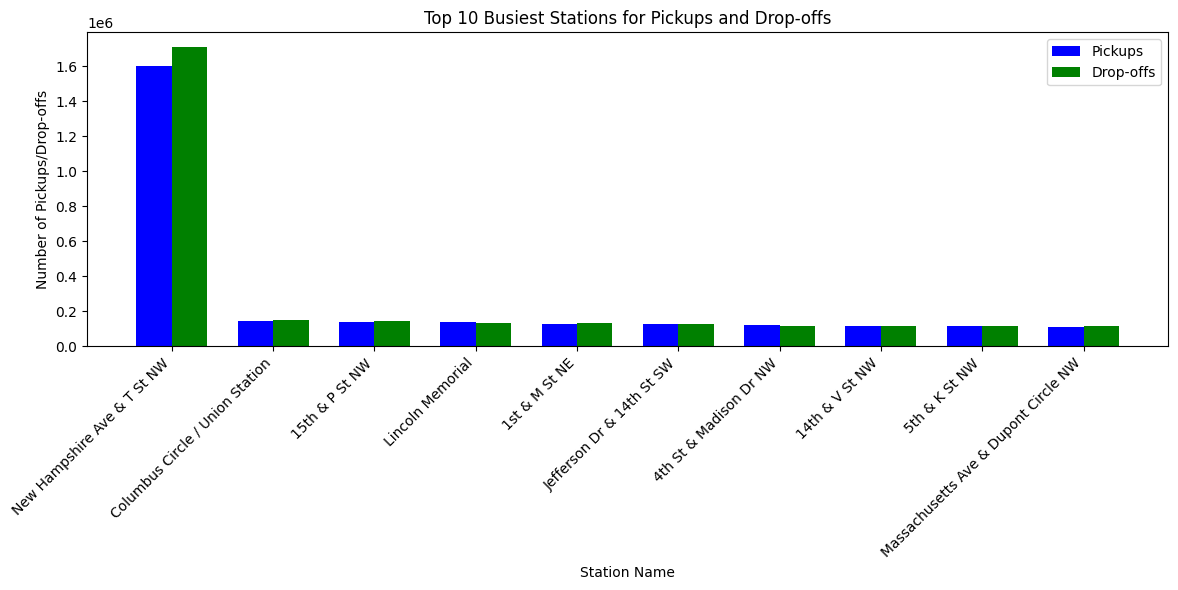

In [15]:
# Plot the top 10 busiest stations
top_busiest_stations = busiest_stations.head(10)

# Set the positions and width for the bars
bar_width = 0.35
index = np.arange(len(top_busiest_stations))

# Create the figure and the axes
fig, ax = plt.subplots(figsize=(12, 6))

# Plot pickup and drop-off counts as side-by-side bars
pickup_bars = ax.bar(index, top_busiest_stations['pickup_count'], bar_width, label='Pickups', color='b')
dropoff_bars = ax.bar(index + bar_width, top_busiest_stations['dropoff_count'], bar_width, label='Drop-offs', color='g')

# Add labels, title, and legend
ax.set_xlabel('Station Name')
ax.set_ylabel('Number of Pickups/Drop-offs')
ax.set_title('Top 10 Busiest Stations for Pickups and Drop-offs')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(top_busiest_stations['station_name'], rotation=45, ha='right')
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()

<p style="background-image: url(https://img.freepik.com/free-vector/neon-lights-background-theme_52683-44625.jpg); font-family: Pacifico, cursive; font-size: 200%; color: #E6E6FA; text-align: center; border-radius: 20%; padding: 20px; font-weight: normal; border: 3px dashed #14adc6; box-shadow: 0px 5px 10px rgba(0, 0, 0, 0.2); text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.4); background-size: cover; background-repeat: no-repeat; background-position: center; width: 50%; margin: 0; float: left;">Correlate with Weather </p>


In [16]:
# Group rentals by date to get the total rentals per day
daily_rentals_per_day = daily_rent_detail.groupby('started_at').size().reset_index(name='rental_count')

# Rename the 'started_at' column in rental data to match the weather data column
daily_rentals_per_day.rename(columns={'started_at': 'datetime'}, inplace=True)

# Merge the rental data with the weather data on the 'datetime' column
combined_df = pd.merge(daily_rentals_per_day, weather, on='datetime', how='inner')

# Display the first few rows of the combined data
combined_df.head()





datetime  rental_count               name  tempmax  tempmin  temp  \
0 2020-05-18             1  Washington,DC,USA     19.9     13.8  16.6   
1 2020-07-05             1  Washington,DC,USA     33.6     24.2  28.4   
2 2020-08-23             1  Washington,DC,USA     31.1     24.1  27.3   
3 2020-09-12             1  Washington,DC,USA     23.8     19.1  21.9   
4 2021-03-20             1  Washington,DC,USA     14.8     -0.3   7.2   

   feelslikemax  feelslikemin  feelslike   dew  humidity  precip  precipprob  \
0          19.9          13.8       16.6  12.4      77.4   0.000           0   
1          38.7          24.2       30.7  22.4      71.3   0.000           0   
2          35.7          24.1       29.2  22.7      77.4   0.011         100   
3          23.8          19.1       21.9  17.5      76.2   0.109         100   
4          14.8          -4.3        5.3  -8.1      34.6   0.000           0   

   precipcover preciptype  snow  snowdepth  windgust  windspeed  winddir  \
0         0.00       rain   0.0        0.0      41.4       27.8     55.8   
1         0.00       rain   0.0        0.0      31.7       24.7    186.9   
2         4.17       rain   0.0        0.0      26.3       21.5    183.2   
3         4.17       rain   0.0        0.0      34.9       17.6     78.0   
4         0.00       rain   0.0        0.0      20.9       24.0     30.8   

   sealevelpressure  cloudcover  visibility  solarradiation  solarenergy  \
0            1017.3        96.6        14.5            34.4          2.8   
1            1014.8        44.3        13.5            69.8          6.1   
2            1017.0        65.2        16.0            61.8          5.2   
3            1023.1        73.0        15.9            22.5          1.7   
4            1034.5        14.2        16.0           184.2         16.0   

   uvindex  severerisk             sunrise              sunset  moonphase  \
0        1   16.336788 2020-05-18 05:52:43 2020-05-18 20:17:00       0.87   
1        4   16.336788 2020-07-05 05:48:58 2020-07-05 20:36:31       0.50   
2        4   16.336788 2020-08-23 06:29:23 2020-08-23 19:51:09       0.16   
3        1   16.336788 2020-09-12 06:47:16 2020-09-12 19:20:29       0.84   
4        6   16.336788 2021-03-20 07:11:06 2021-03-20 19:20:28       0.24   

               conditions                                        description  \
0                Overcast                   Cloudy skies throughout the day.   
1        Partially cloudy                  Partly cloudy throughout the day.   
2  Rain, Partially cloudy  Partly cloudy throughout the day with morning ...   
3  Rain, Partially cloudy  Partly cloudy throughout the day with early mo...   
4                   Clear               Clear conditions throughout the day.   

                icon                                           stations  
0             cloudy  C6294,KDCA,72405013743,72403793728,72403093738...  
1  partly-cloudy-day  KDCA,72405013743,72403793728,F0198,KADW,KDAA,7...  
2               rain  KDCA,72405013743,72403793728,F0198,KADW,KDAA,A...  
3               rain  C6294,KDCA,72405013743,72403793728,D6279,F0198...  
4          clear-day  KDCA,72405013743,72403793728,D6279,KADW,KDAA,F...

In [17]:
# Select only numeric columns for correlation
numeric_cols = combined_df.select_dtypes(include=[np.number]).columns

# Calculate the correlation matrix using only numeric columns
correlation_matrix = combined_df[numeric_cols].corr()

# Display correlation values (especially for rental_count and weather variables)
if 'rental_count' in correlation_matrix.columns:
    print(correlation_matrix[['rental_count']].sort_values(by='rental_count', ascending=False))
else:
    print("rental_count is not in the correlation matrix.")

                  rental_count
rental_count          1.000000
windgust              0.281469
winddir               0.174819
windspeed             0.152038
visibility            0.133897
uvindex               0.107296
solarenergy           0.058887
solarradiation        0.058234
cloudcover            0.032969
precipcover           0.028081
tempmin               0.021577
feelslikemin          0.013730
precip                0.002033
temp                 -0.011217
feelslike            -0.024042
precipprob           -0.026082
tempmax              -0.027355
feelslikemax         -0.042339
snowdepth            -0.055228
snow                 -0.055228
dew                  -0.085330
moonphase            -0.172175
severerisk           -0.187787
sealevelpressure     -0.194573
humidity             -0.199183


# <p style="background-image: url(https://img.freepik.com/free-vector/neon-lights-background-theme_52683-44625.jpg);font-family:Pacifico ,cursive;font-size:150%; color:#E6E6FA; text-align:center; border-radius: 20%; padding:20px; font-weight: normal; border: 3px dashed #14adc6; box-shadow: 0px 5px 10px  rgba(0, 0, 0, 0.2);text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.4); background-size: cover; background-repeat: no-repeat; background-position: center;">ML Regression Models
</p>

In [18]:
# Step 1: Merge Datasets
# Merging on the 'station_name' column
merged_data = pd.merge(usage_frequency, station_list, on='station_name', how='inner')
# Assuming the weather data has a 'date' column to merge on
merged_data = pd.merge(merged_data, weather, left_on='date', right_on='datetime', how='inner')

# Step 2: Feature Selection
# Create a new target variable for daily demand
merged_data['daily_demand'] = merged_data['pickup_counts'] + merged_data['dropoff_counts']

# Select features including relevant weather columns
X = merged_data[['pickup_counts', 'dropoff_counts', 'temp', 'humidity', 'windspeed', 'precip', 'precipprob', 'windgust']]
y = merged_data['daily_demand']

# Step 3: Dimensionality Reduction
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)  # Adjust n_components as necessary
X_pca = pca.fit_transform(X_scaled)

# Step 4: Model Application
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

<p style="background-image: url(https://img.freepik.com/free-vector/neon-lights-background-theme_52683-44625.jpg); font-family: Pacifico, cursive; font-size: 200%; color: #E6E6FA; text-align: center; border-radius: 20%; padding: 20px; font-weight: normal; border: 3px dashed #14adc6; box-shadow: 0px 5px 10px rgba(0, 0, 0, 0.2); text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.4); background-size: cover; background-repeat: no-repeat; background-position: center; width: 50%; margin: 0; float: left;">Linear Regression </p>


In [19]:
# Implement Regression Models
# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

# Step 5: Model Evaluation
def evaluate_model(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    return rmse, r2

# Evaluate Linear Regression
rmse_linear, r2_linear = evaluate_model(y_test, y_pred_linear)
print(f'Linear Regression RMSE: {rmse_linear:.2f}, R2: {r2_linear:.2f}')

Linear Regression RMSE: 18.41, R2: 0.82


<p style="background-image: url(https://img.freepik.com/free-vector/neon-lights-background-theme_52683-44625.jpg); font-family: Pacifico, cursive; font-size: 200%; color: #E6E6FA; text-align: center; border-radius: 20%; padding: 20px; font-weight: normal; border: 3px dashed #14adc6; box-shadow: 0px 5px 10px rgba(0, 0, 0, 0.2); text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.4); background-size: cover; background-repeat: no-repeat; background-position: center; width: 50%; margin: 0; float: left;">Random Forest Regressor </p>


In [20]:
# Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# # Evaluate Random Forest
rmse_rf, r2_rf = evaluate_model(y_test, y_pred_rf)
print(f'Random Forest RMSE: {rmse_rf:.2f}, R2: {r2_rf:.2f}')

Random Forest RMSE: 7.81, R2: 0.97


<p style="background-image: url(https://img.freepik.com/free-vector/neon-lights-background-theme_52683-44625.jpg); font-family: Pacifico, cursive; font-size: 200%; color: #E6E6FA; text-align: center; border-radius: 20%; padding: 20px; font-weight: normal; border: 3px dashed #14adc6; box-shadow: 0px 5px 10px rgba(0, 0, 0, 0.2); text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.4); background-size: cover; background-repeat: no-repeat; background-position: center; width: 50%; margin: 0; float: left;">Visualizing Station Usage Clusters </p>


In [21]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt



# Merge the datasets on station_name (assuming 'start_station_name' represents 'station_name' for matching)
stations_demand = pd.merge(usage_frequency, station_list, how='left', on='station_name')

# Select relevant features for clustering
features = stations_demand[['pickup_counts', 'dropoff_counts']]

# Standardize the data (important for K-Means)
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Perform K-Means clustering (Assuming 4 clusters for demonstration; you can change it)
kmeans = KMeans(n_clusters=4, random_state=42)
stations_demand['cluster'] = kmeans.fit_predict(features_scaled)
# Create a scatter plot using Plotly Express
fig = px.scatter(
    stations_demand, 
    x='pickup_counts', 
    y='dropoff_counts', 
    color='cluster', 
    title='Clustering of Stations based on Demand Patterns (Pickup and Drop-off)',
    labels={
        'pickup_counts': 'Pickup Counts',
        'dropoff_counts': 'Dropoff Counts',
        'cluster': 'Cluster'
    },
    color_continuous_scale='viridis'
)

# Show the plot
fig.show()